In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp

# set display options
pd.set_option('display.max_columns', None)

In [2]:
zri = pd.read_csv('./data/low_pop.csv', index_col=0)

In [3]:
zri.shape

(65849, 46)

In [4]:
zri['MortDeliq30-89'] = zri['MortDeliq30-89'].fillna(zri['MortDeliq30-89'].mean())
zri['MortDeliq90'] = zri['MortDeliq90'].fillna(zri['MortDeliq90'].mean())
zri['education'] = zri['high_school_diploma'] + zri['associates_degree'] * 2 + zri['bachelors_degree'] * 3 +zri['masters_degree']* 4

In [5]:
# zri['withdegree'] = zri['bachelors_degree'] + zri['masters_degree']
# zri['withdegree'] = zri.withdegree.fillna(0)
# zri['hasdegree'] = np.where(zri['withdegree'] >0, 1, 0)
# zri['hasdegree'].value_counts()

In [6]:
zri['AGIncome'] = (zri['AGIncome']*1000)/zri['total_pop']
zri['TotIncome'] = (zri['TotIncome']*1000)/zri['total_pop']
zri['SalariesWages'] = (zri['SalariesWages']*1000)/zri['total_pop']
zri['NumUnemply'] =(zri['NumUnemply']*1000)/zri['total_pop']
zri['TotTaxes'] = (zri['TotTaxes']*1000)/zri['total_pop']

In [7]:
#remove outliers
#zri = zri[(zri.value < 3433.18)]
# zri.income_per_capita = zri.income_per_capita.fillna(0)
# zri.TotTaxes = zri.TotTaxes.fillna(0)
# zri = zri[(zri.income_per_capita < 85180.28)]
# zri = zri[(zri.TotTaxes < 2531.24)]
zri.income_change = zri.income_change.fillna(0)


In [8]:
# #Log Transformation:
zri['LogValue'] = np.log(zri.value)
zri['LogTotTaxes'] = np.log(zri.TotTaxes)
zri['Logincome_per_capita'] = np.log(zri.income_per_capita)

# zri['LogTotIncome'] = np.log(zri.TotIncome)
# zri['LogSalariesWages'] = np.log(zri.SalariesWages)
# zri['Logmedian_age'] = np.log(zri.median_age)
# zri['LogAGIncome'] = np.log(zri.AGIncome)
# zri['Loggini_index'] = np.log(zri.gini_index)
# zri['Logpopulation_change'] = np.log(zri.population_change)


/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
train = pd.merge(zri.loc[zri['Year']==2015].rename(columns = {'LogValue' : 'LogValue_2015'}),
                 zri.loc[zri['Year']==2018][['ZIPCODE', 'Month','LogValue']],
                 how = 'left', on = ['ZIPCODE', 'Month'])
test = pd.merge(zri.loc[zri['Year']==2016].rename(columns = {'LogValue' : 'LogValue_2016'}),
                zri.loc[zri['Year']==2019][['ZIPCODE', 'Month','LogValue']],
                how = 'left', on = ['ZIPCODE', 'Month'])

In [10]:
#drop columns to test

dropped = ['SizeRank', 'City', 'State', 'Metro', 'CountyName',\
        'Month','Year','Labor\nForce','Employed', 'Unemployed',\
        'Year-Month', 'FIPSCode', 'geo_id',\
        'value', 'year', 'TotTaxes', 'income_per_capita'] #'ZIPCODE'

train.drop(columns = dropped, inplace=True)
test.drop(columns = dropped, inplace=True)

# print(test.columns)
# train.columns

In [11]:
train.columns[test.isnull().any()]

Index(['LogValue'], dtype='object')

In [12]:
train = train.dropna(subset=['LogValue'])

In [13]:
X_train = train.drop(columns = ['LogValue'])
y_train = train['LogValue']

In [14]:
test.columns[test.isnull().any()]

Index(['LogValue'], dtype='object')

In [15]:
test = test.dropna(subset=['LogValue'])

In [16]:
X_test = test.drop(columns = ['LogValue'])
y_test = test['LogValue']

In [17]:
#show columns with missing values
print(X_train.columns[X_train.isnull().any()])
print(X_test.columns[X_test.isnull().any()])

Index([], dtype='object')
Index([], dtype='object')


In [18]:
X_train.columns

Index(['Unnamed: 0.1', 'ZIPCODE', 'total_pop', 'Season', 'AGIncome',
       'TotIncome', 'SalariesWages', 'NumUnemply', 'Unemploy-\nment Rate\n(%)',
       'MortDeliq30-89', 'MortDeliq90', 'median_age', 'white_pop', 'black_pop',
       'asian_pop', 'hispanic_pop', 'gini_index',
       'vacant_housing_units_for_rent', 'housing_units_renter_occupied',
       'percent_income_spent_on_rent', 'high_school_diploma',
       'associates_degree', 'bachelors_degree', 'masters_degree',
       'rental_units_supply', 'population_change', 'income_change',
       'supply_change', 'natural_amenity_rank', 'education', 'LogValue_2015',
       'LogTotTaxes', 'Logincome_per_capita'],
      dtype='object')

In [19]:
X_train.shape

(7715, 33)

In [20]:
#feature selection
model_cols = ['LogValue_2015', 'Season', 'LogTotTaxes',
       'MortDeliq90', 'gini_index',
       'black_pop', 'asian_pop', 'white_pop',
       'vacant_housing_units_for_rent', 
       'natural_amenity_rank']


model_cols2 = ['LogValue_2016', 'Season', 'LogTotTaxes',
       'MortDeliq90', 'gini_index',
       'black_pop', 'asian_pop', 'white_pop',
       'vacant_housing_units_for_rent', 
       'natural_amenity_rank']


X_train = X_train[model_cols]

X_test = X_test[model_cols2]


## Model Generation

In [21]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import model_selection

In [22]:
lm = LinearRegression()

lm.fit(X_train, y_train)

print("Train Score: %.4f" % lm.score(X_train, y_train))
print("Test Score:  %.4f" % lm.score(X_test, y_test))

print(lm.score(X_train, y_train)- lm.score(X_test, y_test))



Train Score: 0.9649
Test Score:  0.9604
0.004460839646143078


In [23]:
lm.intercept_, lm.coef_

(0.6284591563285495,
 array([ 9.21934151e-01,  5.52788843e-03,  3.39994386e-03, -5.82041689e-04,
        -1.10009975e-01, -3.67411530e-02,  4.60937551e-02, -3.71995087e-02,
        -7.95633525e-02,  1.79388392e-02]))

In [24]:
X_train.columns

Index(['LogValue_2015', 'Season', 'LogTotTaxes', 'MortDeliq90', 'gini_index',
       'black_pop', 'asian_pop', 'white_pop', 'vacant_housing_units_for_rent',
       'natural_amenity_rank'],
      dtype='object')

In [25]:
# from sklearn.model_selection import cross_val_score
# print(np.sqrt(-1* cross_val_score(lm, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs =-1)))

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

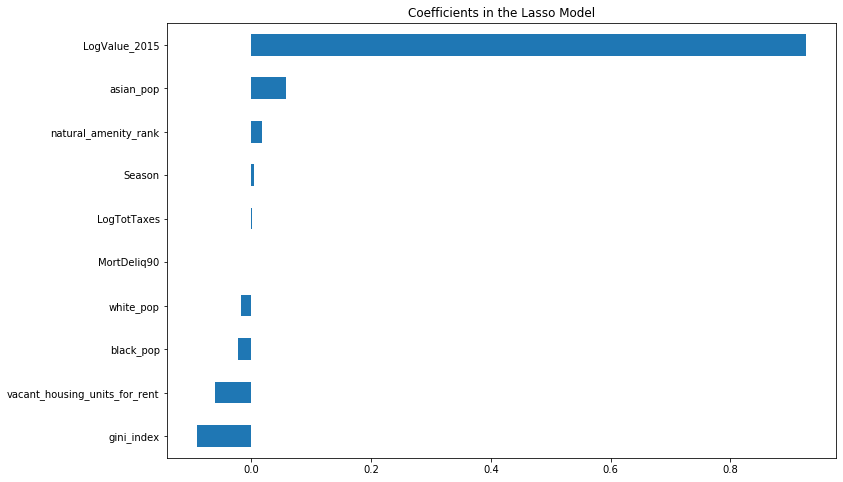

In [26]:
# param_grid={'alpha': np.logspace(-5, -3, 100)}
# grid_search = model_selection.GridSearchCV(estimator = Lasso(), param_grid = param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# print("Cross Validation")
# print("-" * 20)
# print("Best parameter: ", grid_search.best_params_)
# print("Best CV score:  %.4f" % grid_search.best_score_)

# alpha_cv = grid_search.best_estimator_.get_params()['alpha']

lasso = Lasso(alpha = 1e-05, normalize=True).fit(X_train, y_train)
coef = pd.Series(lasso.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values()])
imp_coef.plot(kind = "barh", figsize = (12, 8))
plt.title("Coefficients in the Lasso Model")

In [27]:
print(lasso.score(X_train, y_train))
lasso.score(X_test, y_test)

0.9648223954446894


0.9606429852133201

In [28]:
# For each X, calculate VIF and save in dataframe
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.round(1)

,VIF Factor,features
0,140.9,LogValue_2015
1,7.0,Season
2,50.2,LogTotTaxes
3,7.1,MortDeliq90
4,81.1,gini_index
5,4.1,black_pop
6,2.8,asian_pop
7,17.1,white_pop
8,4.2,vacant_housing_units_for_rent
9,11.1,natural_amenity_rank


/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


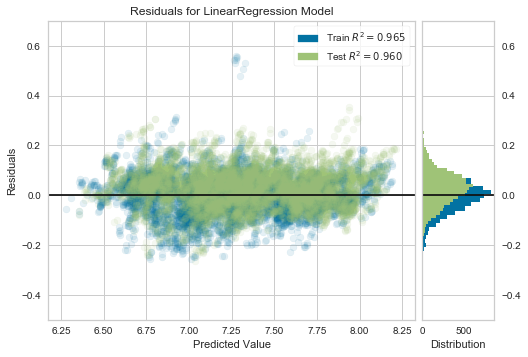

In [29]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(lm, train_alpha = 0.1, test_alpha =0.1)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate ttrain_alpha = 0.1, test_alpha =0.01he model on the test data
plt.ylim([-0.5, 0.7])
visualizer.show()                 # Finalize and render the figure

In [30]:
train_set = pd.concat([X_train, y_train], axis=1)
y = train_set['LogValue']
x = train_set.drop('LogValue', axis=1)

from sklearn.metrics import mean_squared_error

def expo(list_):
    return list(map(exp, list_))

print('Final Model')
print('-'*20)
lm.fit(x, y)
print("R^2 Score:  %.2f" % (100*lm.score(x, y)))
print("Mean Error: $%.0f\n" % mean_squared_error(expo(y), expo(lm.predict(x)), squared=False))


Final Model
--------------------
R^2 Score:  96.49
Mean Error: $109

